# **FINANCIAL ANALYTICS**
---



**Importing necessary libraries**

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



**Loading the Dataset**

In [4]:
# read the data
df=pd.read_csv("/content/Financial Analytics data.csv")

# copying original dataset to another variable to avoid any changes
df_copy=df.copy()

**Displaying the first few rows of the dataset**

In [5]:
# Returns the first 5 rows
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


**Dispalying the last few rows of the dataset**

In [6]:
# Returns last 5 rows
df.tail()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN
487,500,L T Foods,NaN,NaN,NaN


In [7]:
# Droping last column which has NaN values
df_new=df.drop('Unnamed: 4',axis=1)
print(df_new)

     S.No.             Name  Mar Cap - Crore  Sales Qtr - Crore
0        1   Reliance Inds.        583436.72           99810.00
1        2              TCS        563709.84           30904.00
2        3        HDFC Bank        482953.59           20581.27
3        4              ITC        320985.27            9772.02
4        5          H D F C        289497.37           16840.51
..     ...              ...              ...                ...
483    496  Lak. Vilas Bank          3029.57             790.17
484    497            NOCIL          3026.26             249.27
485    498    Orient Cement          3024.32             511.53
486    499  Natl.Fertilizer          3017.07            2840.75
487    500        L T Foods              NaN                NaN

[488 rows x 4 columns]


**Checking the shape of the dataset**





In [ ]:
# The shape attribute gives the number of rows and columns in the dataset
print("The Number of rows in the dataset:",df_new.shape[0])
print("The Number of columns in the dataset:",df_new.shape[1])

The Number of rows in the dataset: 488
The Number of columns in the dataset: 4


***Observations:***

---


*The Financial analysis dataset has 488 rows and 4 columns.*

**Checking the datatypes of columns in the dataset**

In [ ]:
# info() function helps in identifying the datatypes of the columns in the dataset
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.4+ KB


***Observations***

---


*  *We could understand that there are missing values in some columns like Mar Cap - Crore and Sales Qtr - Crore.*
* *The columns 'Mar Cap - Crore' and Sales Qtr - Crore is of float datatype and the column 'Name' is of object type.*




**Checking the statistical summary of the numerical variables in the dataset**

In [ ]:
# describe() function is used to get the statistical summary of the dataset
print("The statistical summary of numerical variables")
print("_______________________________________________")
df_new.describe().T


The statistical summary of numerical variables
_______________________________________________


,count,mean,std,min,25%,50%,75%,max
S.No.,488.0,251.508197,145.884078,1.00,122.750,252.50,378.25,500.00
Mar Cap - Crore,479.0,28043.857119,59464.615831,3017.07,4843.575,9885.05,23549.90,583436.72
Sales Qtr - Crore,365.0,4395.976849,11092.206185,47.24,593.740,1278.30,2840.75,110666.93


***Observations***


---


* *There is significant variation in both market capitalisation and quarterly sales, suggesting a wide range of companies in terms of size and business performance.*

*   *With a small number of companies having extremely high market capitalisation and sales compared to the rest, the data is most likely skewed to the right (positive skew).*

* *Both market capitalisation and sales have missing values, which should be fixed during data cleaning to ensure a thorough analysis.*




**Checking the statistical summary of the categorical variables in the dataset**

In [ ]:
# describe() function is used to get the statistical summary of the datasset
print("The statistical summary of categorical variables")
print("________________________________________________")
df_new.describe(include='object').T

The statistical summary of categorical variables
________________________________________________


,count,unique,top,freq
Name,488,488,Reliance Inds.,1


***Observations***

* *There are 488 unique company names listed in the dataset, as indicated by the total number of entries in the 'Name' column (488).*

* *Reliance Inds. is the most prominent (and frequent) entry in this column. Like every other company name in the dataset, "Reliance Inds." appears only once, as indicated by the freq of 1.*

* *The top value's frequency of 1 indicates that every company name occurs exactly once in the dataset.*

**Checking for missing values in the dataset**

In [ ]:
# isnull() function is used to identify the null values in a dataset
df_new.isnull().sum()

,0
S.No.,0
Name,0
Mar Cap - Crore,9
Sales Qtr - Crore,123


***Observations***

---
*There are missing values in Mar Cap - Crore and Sales Qtr - Crore columns.*


**Checking for duplicate values in the dataset**

In [ ]:
# duplicated() function is used to identify the duplicate values in a dataset
print("The duplicate values in the dataset is",df_new.duplicated().sum())

The duplicate values in the dataset is 0


***Observations***

---
*There are no duplicate values in the dataset taken for analysis.*


# **Data Preprocessing**

**Missing Value Treatment**

In [8]:
df_new.isnull().sum()

,0
S.No.,0
Name,0
Mar Cap - Crore,9
Sales Qtr - Crore,123


In [9]:
# Handling missing values
df_new['Mar Cap - Crore'].fillna(df_new['Mar Cap - Crore'].median(), inplace=True)
df_new['Sales Qtr - Crore'].fillna(df_new['Sales Qtr - Crore'].median(), inplace=True)


***Observations:***

*As seen in the statistical summary, Map Cap - Crore and Sales Qtr - Crore has a huge difference between the 3rd quartile and the maximum value indicating the presence of outliers.In this case imputing the missing value with median is the appropiate way.*

In [10]:
df_new.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [11]:
# Checking for missing values after filling the values
df_new.isnull().sum()

,0
S.No.,0
Name,0
Mar Cap - Crore,0
Sales Qtr - Crore,0


***Outlier treatment***

<function matplotlib.pyplot.show(close=None, block=None)>

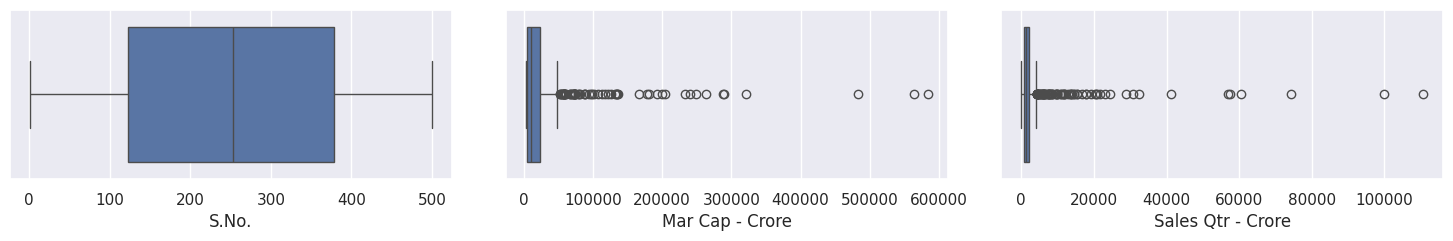

In [12]:
# Identifying numerical columns in the dataset
num_col_list= df_new.select_dtypes(include = np.number).columns.tolist()

# Plotting box plot to check for outliers
plt.figure(figsize=(15,10))
for i , variable in enumerate(num_col_list):
  plt.subplot(4,3,i+1)
  sns.boxplot(data=df_new,x=variable),
  plt.tight_layout(pad=2)
plt.show

***Observations:***

---
*Even though there are outliers in the data, they are proper values and hence we will not treat them.*


# **Exploratory Data Analysis (EDA)**

**Univariate Analysis**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15,10), kde=False, bins=None):
  """
  Boxplot and histogram combined

  data: dataframe
  feature: dataframe column
  figsize: size of figure (default (15,10))
  kde: whether to show the density curve (default False)
  bins: number of bins for histogram (default None)
  """
  f2, (ax_box2, ax_hist2) = plt.subplots(
      nrows=2, # Number of rows of the subplot grid= 2
      sharex=True, #x-axis will be shared among all subplots
      gridspec_kw={"height_ratios": (0.25,0.75)},
      figsize=figsize,
  )# creating the 2 subplots
  sns.boxplot(
      data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
  ) # boxplot will be created and a triangle will indicate the mean value of the column
  sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
  ) if bins else sns.histplot(
      data=data, x=feature, kde=kde, ax=ax_hist2
  ) # For histogram
  ax_hist2.axvline(
      data[feature].mean(), color="green", linestyle="--"
  ) # Add mean to the histogram
  ax_hist2.axvline(
      data[feature].median(),color="black", linestyle='-'
  ) # Add median to the histogram

**Mar Cap - Crore**

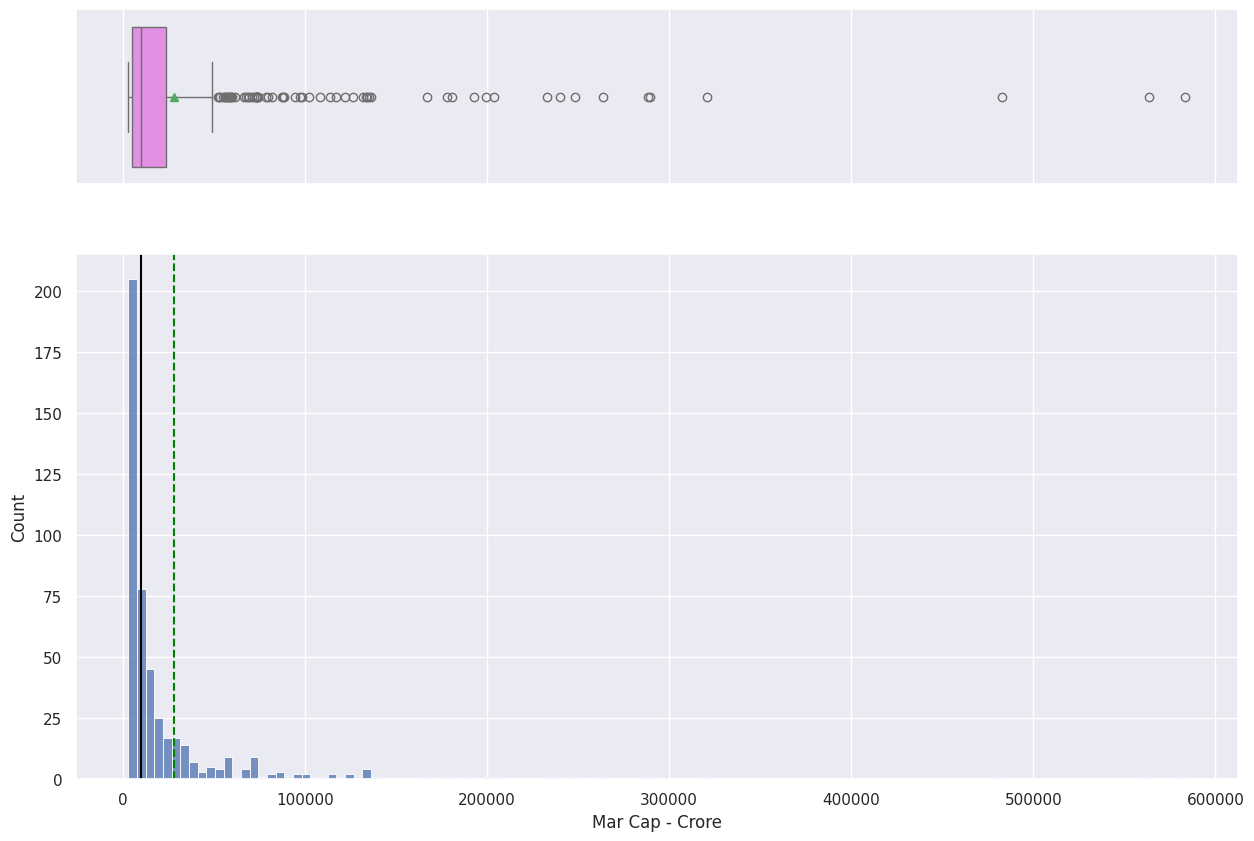

In [ ]:
histogram_boxplot(df_new,'Mar Cap - Crore')

***Observations***

---



*The distribution is highly skewed, indicating the concentration of companies in the lower market capitalization range, while a few companies have significantly higher market capitalizations.*




In [ ]:
# Sorting according to the top performing companies
top_companies = df_new.sort_values(by='Mar Cap - Crore', ascending=False).head(10)
print(top_companies[['Name', 'Mar Cap - Crore']])


             Name  Mar Cap - Crore
0  Reliance Inds.        583436.72
1             TCS        563709.84
2       HDFC Bank        482953.59
3             ITC        320985.27
4         H D F C        289497.37
5  Hind. Unilever        288265.26
6   Maruti Suzuki        263493.81
7         Infosys        248320.35
8         O N G C        239981.50
9  St Bk of India        232763.33


***Sales Qtr - Crore***

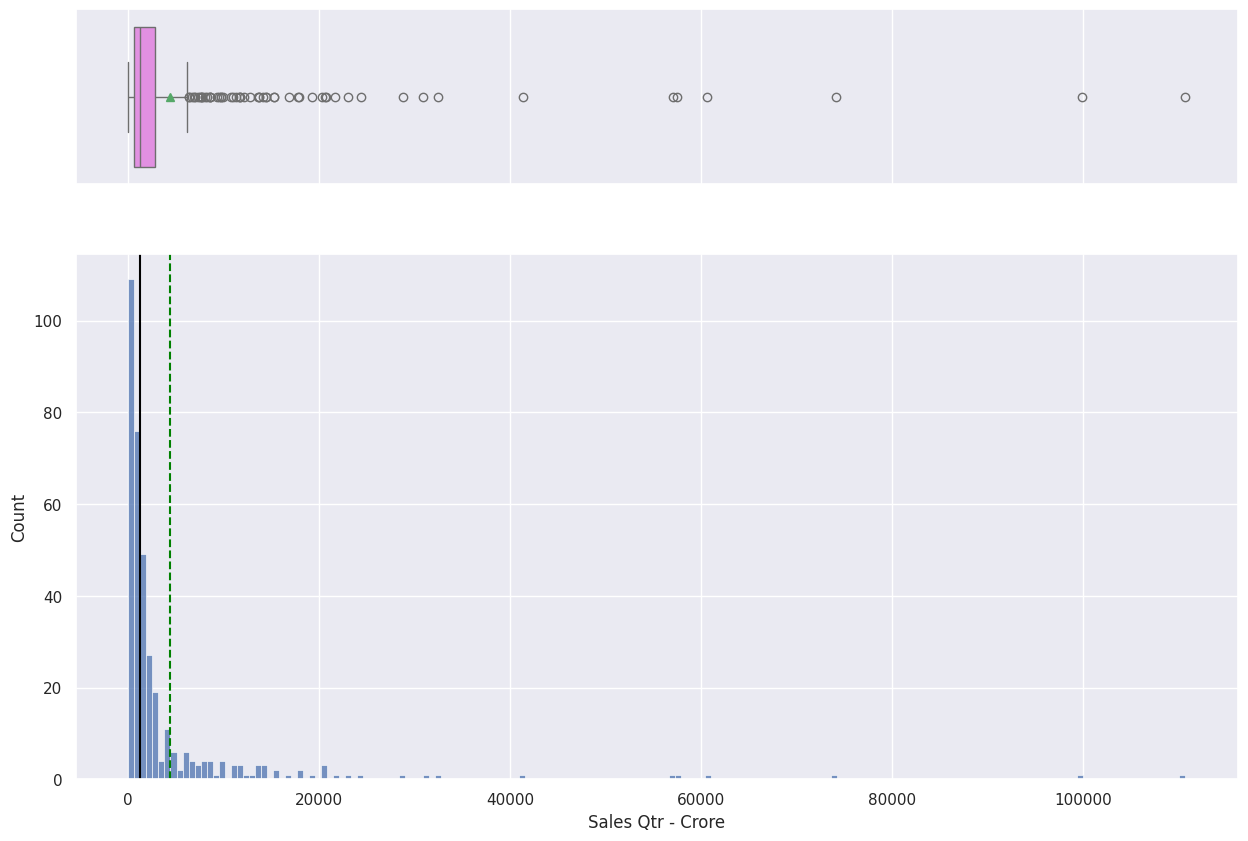

In [ ]:
histogram_boxplot(df_new,'Sales Qtr - Crore')

***Observations:***


---


*  *The distribution is highly skewed.*
*  *Most companies have relatively low quartely sales, while few companies have significantly higher sales.*





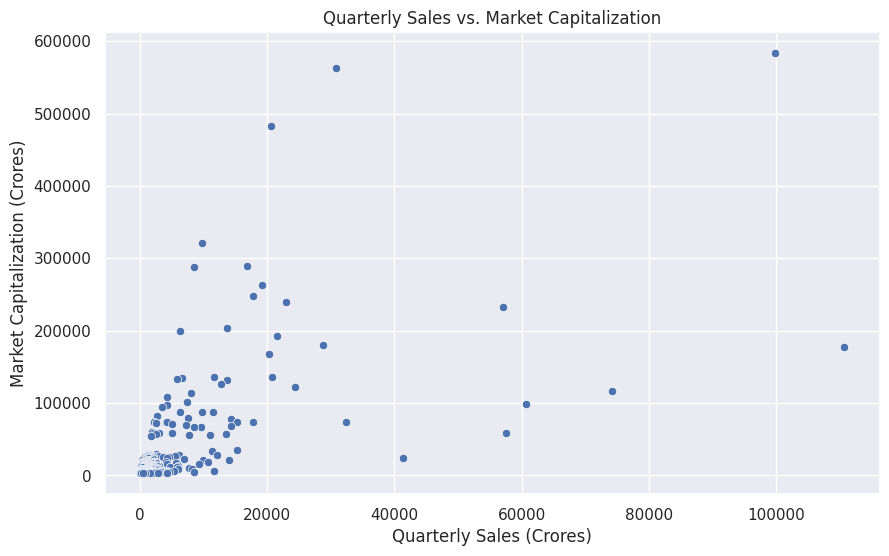

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales Qtr - Crore', y='Mar Cap - Crore', data=df)
plt.title('Quarterly Sales vs. Market Capitalization')
plt.xlabel('Quarterly Sales (Crores)')
plt.ylabel('Market Capitalization (Crores)')
plt.show()


***Observations:***

*   *The market capitalisation and quarterly sales are positively correlated. The market capitalisation typically rises in accordance with the quarterly sales. This implies that companies with larger market capitalisations usually have higher sales.*

*   *The dense cluster of points close to the origin indicates that a significant number of companies have low market capitalisation in addition to low quarterly sales. This suggests that, in addition to a small number of outliers, the majority of the companies in the dataset have relatively low sales and market capitalisation.*



**Bivariate Analysis**

**Checking correlation**

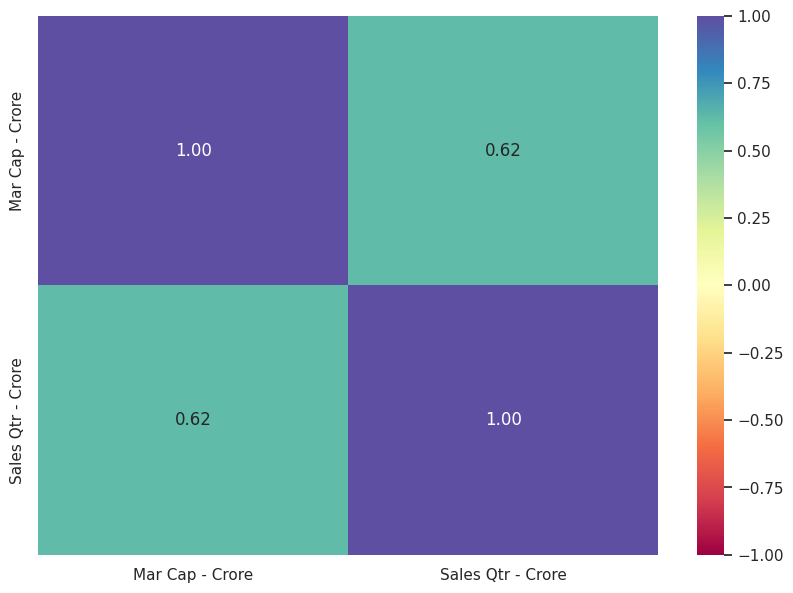

In [ ]:
# Identifying numerical columns
num_cols=df_new.select_dtypes(include=np.number).columns.tolist()

# Dropping S.No as it cannot be considered as a numerical column for analysis
num_cols.remove('S.No.')


# Plotting heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

***Observations***

---



*   *This displays a correlation matrix between the two numerical columns Mar Cap - Crore and Sales Qtr - Crore.*
*   *It shows a moderate positive correlation betweeen market capitalization and quartely sales, indicating larger companies tend to have higher sales figures.*



***Key Insights***

* *According to the analysis, market capitalisation (Mar Cap - Crore) and quarterly sales (Sales Qtr - Crore) have a moderately positive correlation. This implies that companies tend to have higher quarterly sales figures when their market capitalisations are higher.*

* *There is a notable disparity in the market capitalisation and sales distribution among the top 500 companies. When it comes to sales and market capitalisation, certain companies rule the sector, with many others having substantially lower numbers.
It could be investigated further if there are any outliers or if the distribution is skewed by a few large, dominating companies.*

* *The top-performing companies in the market can be found with the aid of rankings based on market capitalisation and sales. These rankings can also be used to monitor performance over time and identify industry trends.*





***Recommendations***

* *Management should use the highest-performing businesses as success benchmarks. Their strategies, market positioning, and operational efficiencies can all be analysed to learn important lessons that other portfolio companies can use.*

* *Pay attention to industries that frequently outperform others in terms of market capitalisation and sales.*

* *Companies with a high market capitalisation but decreasing sales should be avoided as this may indicate further financial instability.*


